In [85]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree
import pandas as pd

In [86]:
df = pd.read_csv("drug200.csv")
print(df.shape)
df.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [87]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [88]:
le = LabelEncoder()
x_copy = X.copy()

x_copy["Sex"] = le.fit_transform(x_copy["Sex"])
x_copy["BP"] = le.fit_transform(x_copy["BP"])
x_copy["Cholesterol"] = le.fit_transform(x_copy["Cholesterol"])
x_copy.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
5,22,0,2,0,8.607
6,49,0,2,0,16.275
7,41,1,1,0,11.037
8,60,1,2,0,15.171
9,43,1,1,1,19.368


In [89]:
X_train, X_test, y_train, y_test = train_test_split(x_copy, y, test_size=0.3, random_state=42)
print(X_train.shape[0])
print(X_test.shape[0])

140
60


In [90]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [91]:
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

print(accuracy_score(y_test, clf.predict(X_test)))
print(accuracy_score(y_train, clf.predict(X_train)))

1.0
1.0
1.0
1.0


In [92]:
y_copy = y.copy()
y_copy = le.fit_transform(y_copy)

print(y_copy)

[4 2 2 3 4 3 4 2 4 4 2 4 4 4 3 4 3 0 2 4 4 4 4 4 4 4 4 3 4 4 3 1 3 4 3 3 0
 3 3 3 4 1 4 3 3 3 0 2 4 4 4 3 4 4 1 2 1 4 3 4 4 0 4 3 1 4 0 3 4 4 1 4 3 4
 4 4 0 4 0 3 1 3 2 0 2 1 3 4 4 4 4 4 4 4 4 3 4 4 4 4 0 0 2 3 4 3 3 4 1 4 0
 3 3 3 3 4 3 3 0 4 4 4 4 4 1 4 4 3 4 3 4 4 3 4 4 3 1 0 1 3 0 4 1 4 0 3 3 0
 3 2 0 1 3 3 4 2 0 4 2 3 3 1 3 4 4 4 4 3 4 0 3 3 4 4 0 4 0 4 4 4 4 3 3 4 4
 4 1 0 4 4 4 0 4 2 4 2 2 3 3 3]


In [93]:
X_train, X_test, y_train, y_test = train_test_split(x_copy, y_copy, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

print(accuracy_score(y_test, clf.predict(X_test)))
print(accuracy_score(y_train, clf.predict(X_train)))

1.0
1.0
1.0
1.0


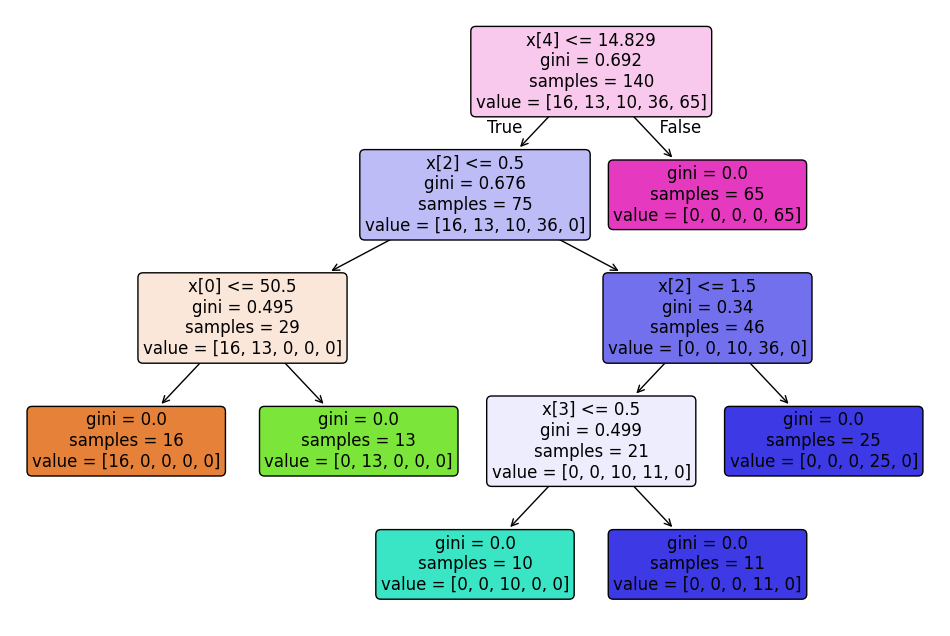

In [97]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, fontsize=12, filled=True, rounded=True)
plt.show()